In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
def loadCityNames():
	city = []
	lines = open('sgb128_name.txt', 'r').readlines()
	for line in lines:
		if line[0] != '#':
			city.append(line)
	return city

def loadDistMatrix():
	distMatrix = []
	lines = open('sgb128_dist.txt', 'r').readlines()
	for line in lines:
		if line[0] != '#':
			distMatrix.append([int(i) for i in line.split()])
	return distMatrix

def loadCityCordinates():
	cityCords, i = {}, 0
	lines = open('sgb128_xy.txt', 'r').readlines()
	for line in lines:
		if line[0] != '#':
			cityCords[i] = tuple([float(i) for i in line.split()])
			i += 1
	return cityCords

def genEdgeList(cityCords, distMatrix):
	edgeList = []
	for i in range(len(cityCords)):
		for j in range(i + 1, len(cityCords)):
			if np.linalg.norm(np.array((cityCords[i][0], cityCords[i][1])) - (cityCords[j][0], cityCords[j][1])) <= 230:
				edgeList.append((i, j, distMatrix[i][j]))
	return edgeList

NOTE : We have add all the required libraries, and cleaned the files that we already downloaded from the given link in the assignment. We, also applied Shortest path/Euclidian distance inbuilt function for generating Edgelist file as you can see in above code, as all the distance in that file contains distance values <=230.

In [3]:
cities = loadCityNames()
# srcName, destName = cities[6], cities[16]
distMatrix = loadDistMatrix()
cityCords = loadCityCordinates()
edgeList = genEdgeList(cityCords, distMatrix)

We, called all the functions and we get all the values, as required.

In [4]:
G = nx.Graph()
G.add_nodes_from([i for i in range(0, 128)])
# G.add_nodes_from([cord for cord in cityCords.values()]) -> Don't use, nodes are better with numbers.
G.add_weighted_edges_from(edgeList)

Here, we added all 128 nodes to the Graphs from the NetworkX object we created. If you want to print all the cities's X and Y cordinates values just like "sgb128_xy.txt " then you can uncomment the line above and run the code again. 

In [5]:
print(G.nodes.data())
print("--------------------------------------------------------------------------------------------")
print(G.edges.data())

[(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), (7, {}), (8, {}), (9, {}), (10, {}), (11, {}), (12, {}), (13, {}), (14, {}), (15, {}), (16, {}), (17, {}), (18, {}), (19, {}), (20, {}), (21, {}), (22, {}), (23, {}), (24, {}), (25, {}), (26, {}), (27, {}), (28, {}), (29, {}), (30, {}), (31, {}), (32, {}), (33, {}), (34, {}), (35, {}), (36, {}), (37, {}), (38, {}), (39, {}), (40, {}), (41, {}), (42, {}), (43, {}), (44, {}), (45, {}), (46, {}), (47, {}), (48, {}), (49, {}), (50, {}), (51, {}), (52, {}), (53, {}), (54, {}), (55, {}), (56, {}), (57, {}), (58, {}), (59, {}), (60, {}), (61, {}), (62, {}), (63, {}), (64, {}), (65, {}), (66, {}), (67, {}), (68, {}), (69, {}), (70, {}), (71, {}), (72, {}), (73, {}), (74, {}), (75, {}), (76, {}), (77, {}), (78, {}), (79, {}), (80, {}), (81, {}), (82, {}), (83, {}), (84, {}), (85, {}), (86, {}), (87, {}), (88, {}), (89, {}), (90, {}), (91, {}), (92, {}), (93, {}), (94, {}), (95, {}), (96, {}), (97, {}), (98, {}), (99, {}), (100, {})

In [6]:
for i in range(len(cities)):
    G.nodes[i]['name'] = cities[i]
print(G.nodes.data())

[(0, {'name': 'Youngstown, OH\n'}), (1, {'name': 'Yankton, SD\n'}), (2, {'name': 'Yakima, WA\n'}), (3, {'name': 'Worcester, MA\n'}), (4, {'name': 'Wisconsin Dells, WI\n'}), (5, {'name': 'Winston-Salem, NC\n'}), (6, {'name': 'Winnipeg, MB\n'}), (7, {'name': 'Winchester, VA\n'}), (8, {'name': 'Wilmington, NC\n'}), (9, {'name': 'Wilmington, DE\n'}), (10, {'name': 'Williston, ND\n'}), (11, {'name': 'Williamsport, PA\n'}), (12, {'name': 'Williamson, WV\n'}), (13, {'name': 'Wichita Falls, TX\n'}), (14, {'name': 'Wichita, KS\n'}), (15, {'name': 'Wheeling, WV\n'}), (16, {'name': 'West Palm Beach, FL\n'}), (17, {'name': 'Wenatchee, WA\n'}), (18, {'name': 'Weed, CA\n'}), (19, {'name': 'Waycross, GA\n'}), (20, {'name': 'Wausau, WI\n'}), (21, {'name': 'Waukegan, IL\n'}), (22, {'name': 'Watertown, SD\n'}), (23, {'name': 'Watertown, NY\n'}), (24, {'name': 'Waterloo, IA\n'}), (25, {'name': 'Waterbury, CT\n'}), (26, {'name': 'Washington, DC\n'}), (27, {'name': 'Warren, PA\n'}), (28, {'name': 'Walla Wa

In [7]:
colors = ['aqua' for i in range(0, len(cities))]
colors[6], colors[16] = 'green', 'red'

Now, we will give colors to all the cities nodes, and override condition for the Starting and the Destination node with Green and the Red color. And we will plot the our nodes with the weighted edeges just like below code, with the help of  matplotlib library and NetworkX.

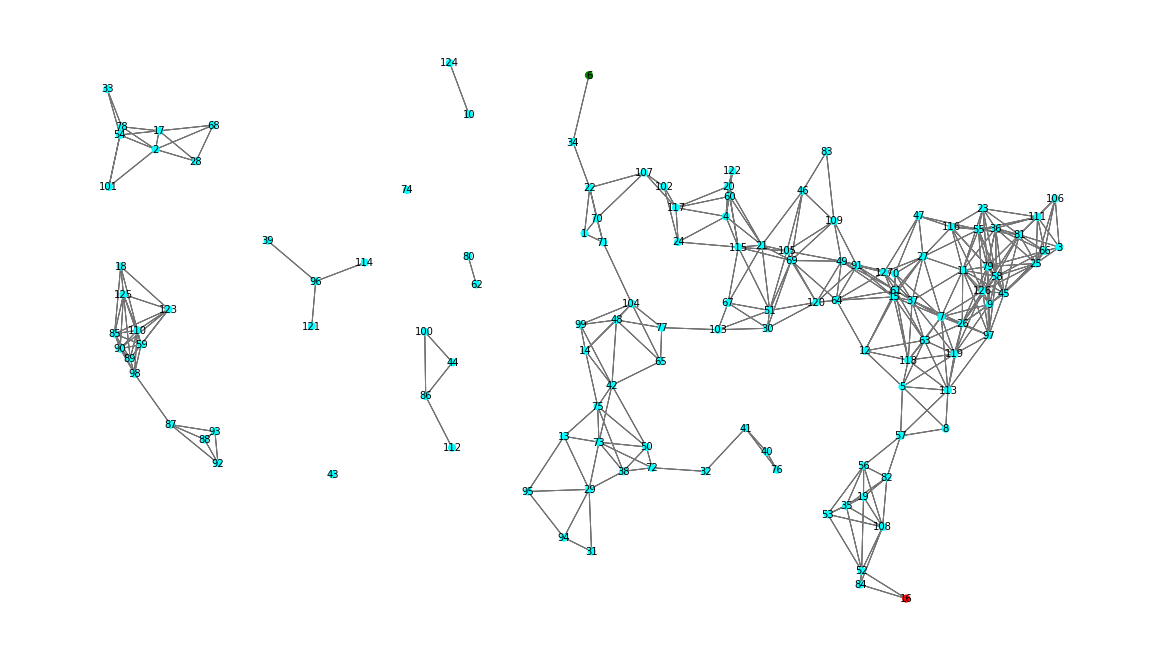

In [8]:
plt.rcParams['figure.figsize'] = (16, 9)
nx.draw(G, cityCords, node_size=10)
nx.draw_networkx_nodes(G, cityCords, nodelist=list(G.nodes), node_color=colors, node_size=50)
nx.draw_networkx_edges(G, cityCords, edgelist=list(G.edges), edge_color='gray')
nx.draw_networkx_labels(G, cityCords, font_size=10)
plt.show()

As you can see, we can easity identify our staring and ending nodes from the above graph, and we gave them the index number so that you can figure it out their location.

Now, let's apply A* Algorithm with NetworkX inbuilt library, in which our Weight attribute is by defaul our distace as shown in nodes list above. Here, A* by default takes 3rd attribute as Weight, which is further used to calculate weighted A* with given distace. 

[6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]
AStar Default (Used weight as distance in sgb128_dist.txt ): 11588


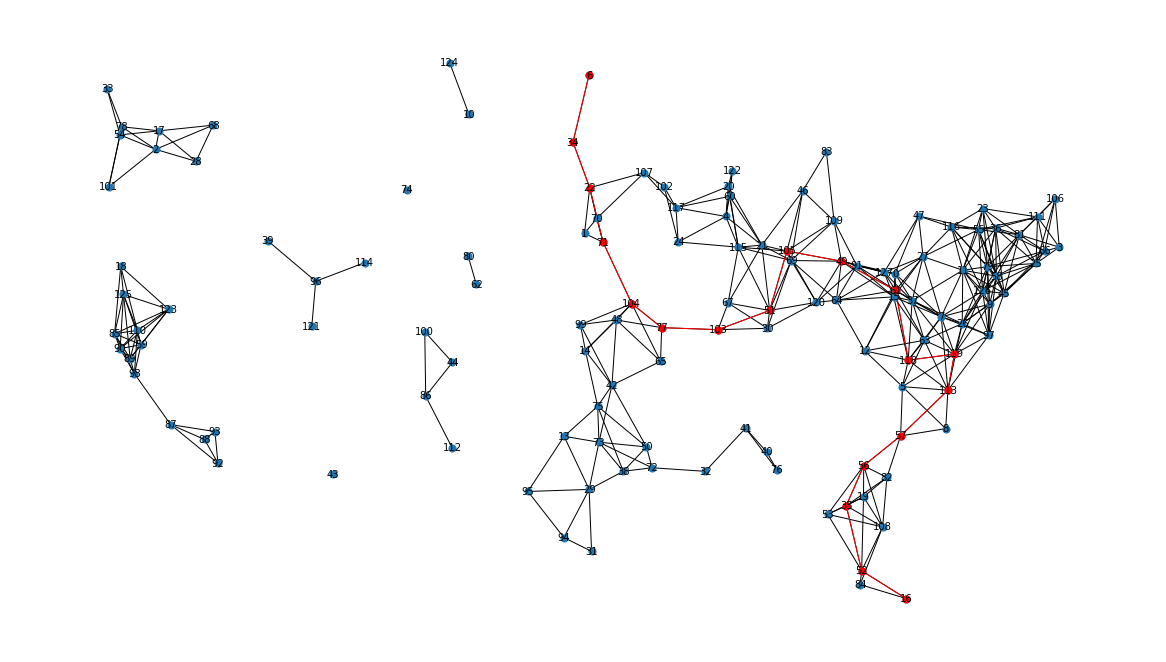

In [9]:
path = nx.astar_path(G, 6, 16) 
print(path)
pathLength = nx.astar_path_length(G, 6, 16)
print(f'AStar Default (Used weight as distance in sgb128_dist.txt ): {pathLength}')
pathEdges = []
for x, y in zip(path, path[1:]):
	pathEdges.append((x, y))

plt.rcParams['figure.figsize'] = (16, 9)
nx.draw(G, cityCords, node_size=50)
nx.draw_networkx_nodes(G, cityCords, nodelist=path, node_color='red', node_size=50)
nx.draw_networkx_edges(G, cityCords, edgelist=pathEdges, edge_color='red')
nx.draw_networkx_labels(G, cityCords, font_size=10)
plt.show()

As you can see above, we got our shortest path A* algorithm with the distance of 11588 with 19 different nodes which are cities in our cases, and the list number of the cities given above the graph. And for the names of the city, you can refere my prvious results of the nodes : city names.

In [10]:
W = 8
def euDistHeuristic(a, b):
	(x1, y1), (x2, y2) = cityCords[a], cityCords[b]
	return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) * W

Now, we will calculate heuristic function, and the formula was taken from the references that you provides us, not from the NetworkX examples. I tried different values of W = [1,2,3,4,5,6,7,8,9,10,200,1500]. And i found out some different results like below.

W = [1,2,3] ( Same path and same distance as non heuristic A* algorithm ) \n

W = [4,5,6] ( One different node from A*'s path, and different distance )\n

W = [7]     ( One again different node from A*'s path and different distance )\n

W = [8 to infinite] (Different then W=7, but same for all the values of 8 and above )\n

[6, 34, 22, 71, 104, 77, 103, 51, 120, 64, 12, 5, 57, 56, 108, 84, 16]
AStar with Weighted (W=8) Heuristic: 14710


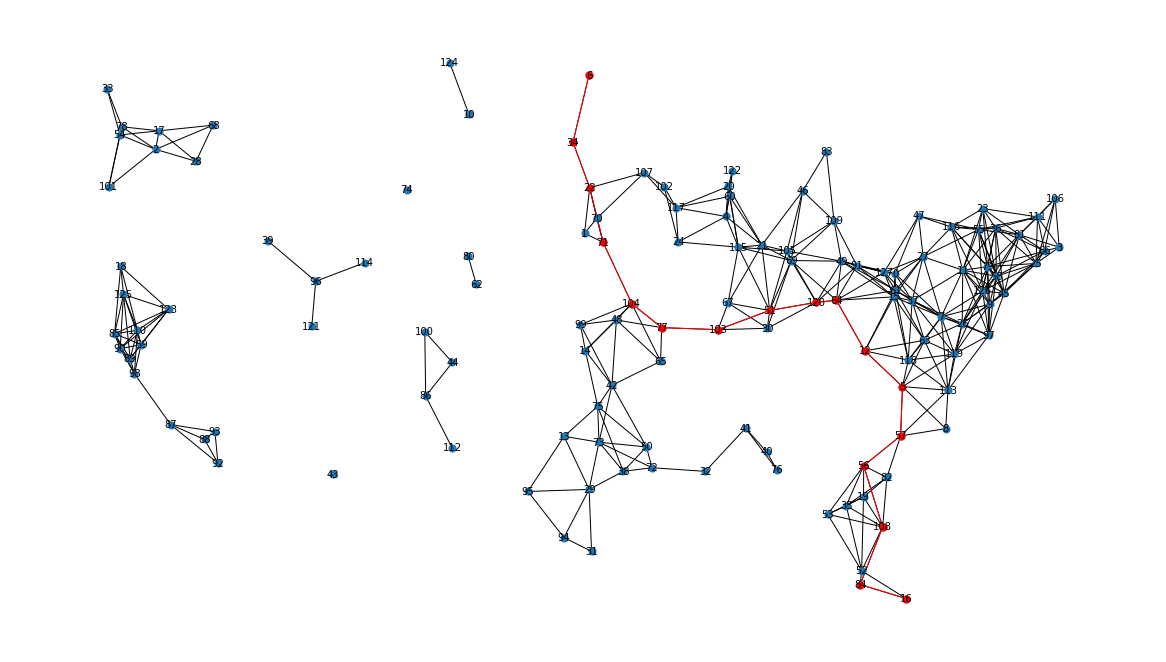

In [11]:
path = nx.astar_path(G, 6, 16, heuristic=euDistHeuristic)
print(path)
pathLength = nx.astar_path_length(G, 6, 16, heuristic=euDistHeuristic)
print(f'AStar with Weighted (W=8) Heuristic: {pathLength}')
pathEdges = []
for x, y in zip(path, path[1:]):
	pathEdges.append((x, y))

plt.rcParams['figure.figsize'] = (16, 9)
nx.draw(G, cityCords, node_size=50)
nx.draw_networkx_nodes(G, cityCords, nodelist=path, node_color='red', node_size=50)
nx.draw_networkx_edges(G, cityCords, edgelist=pathEdges, edge_color='red')
nx.draw_networkx_labels(G, cityCords, font_size=10)
plt.show()

Here i have ploted the path for the A* with Heuristic function, in which W=8, and you can see the distace of that path is 14710, and node count is 17, which is less than simple A* Algorithm, but our goal is to find the shortest path, not least nodes. So, it is a good representation of different values of W.

In [12]:
path = nx.single_source_dijkstra(G, 6, 16)
print(f'Single Source Dijkstra: {path[0]}\nPath: {path[1]}')

Single Source Dijkstra: 11588
Path: [6, 34, 22, 71, 104, 77, 103, 51, 105, 49, 61, 118, 119, 113, 57, 56, 35, 52, 16]


We calculated the Dijkstra shortest path and it is as same as A*. 

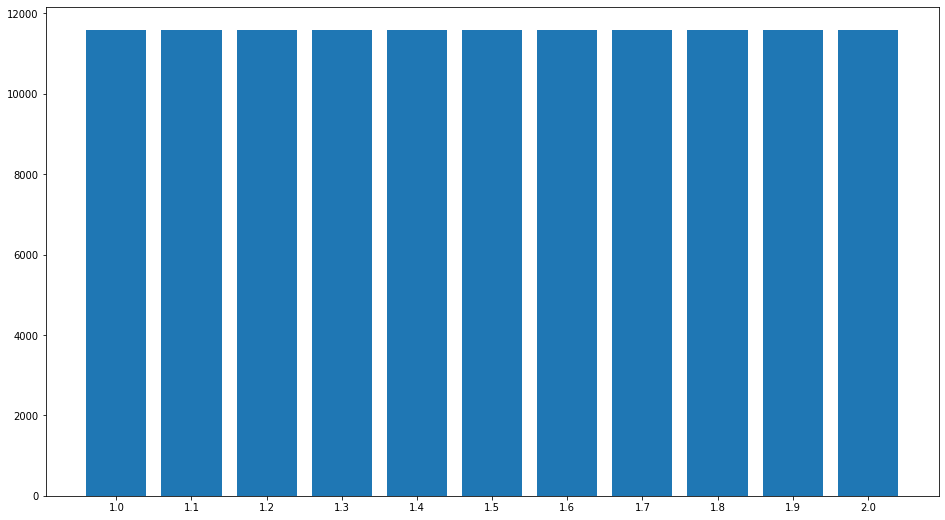

In [13]:
W = 0

def euDistHeuristic(a, b):
	(x1, y1), (x2, y2) = cityCords[a], cityCords[b]
	return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) * W

pathLens = []
for i in [x / 10.0 for x in range(10, 21, 1)]:
    W = i
    pathLens.append(nx.astar_path_length(G, 6, 16, heuristic=euDistHeuristic))

plt.bar([str(x / 10.0) for x in range(10, 21, 1)], pathLens)
plt.show()

We, also calculated for all the W values for between [1 to 2] with each increment of 0.1, and we plotted the graph which shows us that, there is no change in any values of W. It is the same distance for all values. 

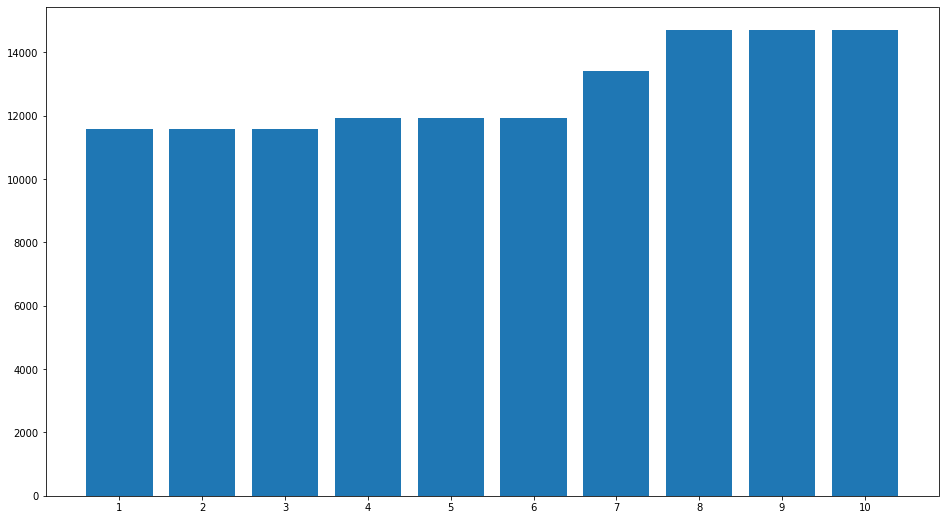

In [14]:
W = 0

def euDistHeuristic(a, b):
	(x1, y1), (x2, y2) = cityCords[a], cityCords[b]
	return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) * W

pathLens = []
for i in range(1, 11):
    W = i
    pathLens.append(nx.astar_path_length(G, 6, 16, heuristic=euDistHeuristic))

plt.bar([str(x) for x in range(1, 11)], pathLens)
plt.show()

Just to be sure for my observation of above, about the different values of W between [1 to 10], I plot this histogram just to make sure, and it exactly shows us the same thing that i observed before. Values of distance changes on the 4,7,8 nodes.